In [1]:
!pip install pandas
!pip install geopandas
!pip install openpyxl
!pip install plotly
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Loading data

The data is provided by Berlin Open Data portal

In [2]:
detectors_dataset_path = "https://mdhopendata.blob.core.windows.net/verkehrsdetektion/Stammdaten_Verkehrsdetektion_2022_07_20.xlsx"
detector_readings_dataset_path = [f'https://mdhopendata.blob.core.windows.net/verkehrsdetektion/2021/Messquerschnitt/mq_hr_2021_{i:02}.csv.gz' for i in range(1, 13)]
incidents_dataset_path = "https://download.statistik-berlin-brandenburg.de/c2b6d25afa19b607/8d9164595b8b/AfSBBB_BE_LOR_Strasse_Strassenverkehrsunfaelle_2021_Datensatz.csv"

In [3]:
import pandas as pd

detectors_df = pd.read_excel(detectors_dataset_path)
incidents_df = pd.read_csv(incidents_dataset_path, delimiter=';', decimal=',')
detector_readings_dfs = [pd.read_csv(i, compression='gzip', delimiter=';') for i in detector_readings_dataset_path]

# Data overview

Detectors dataset includes following columns:
- MQ_KURZNAME: name of the detector group
- LÄNGE: longitude of the detector group (WGS84 coordinate system)
- BREITE: latitude of the detector group (WGS84 coordinate system)

In [4]:
detectors_df.rename(columns={"MQ_KURZNAME": "mq_name", "LÄNGE (WGS84)": "longitude", "BREITE (WGS84)": "latitude"}, inplace=True)
detectors_df.head()

mq_name   DET_NAME_ALT   DET_NAME_NEU         DET_ID15          MQ_ID15  \
0   TE001  TEU00002_Det0  TE001_Det_HF1  100101010000167  100201010000077   
1   TE001  TEU00002_Det1  TE001_Det_HF2  100101010000268  100201010000077   
2   TE002  TEU00002_Det2  TE002_Det_HF1  100101010000369  100201010000178   
3   TE002  TEU00002_Det3  TE002_Det_HF2  100101010000470  100201010000178   
4   TE004  TEU00004_Det0  TE004_Det_HF1  100101010000874  100201010000380   

     STRASSE                                           POSITION  \
0       A115                        AS Spanische Allee – Brücke   
1       A115                        AS Spanische Allee – Brücke   
2       A115                        AS Spanische Allee – Brücke   
3       A115                        AS Spanische Allee – Brücke   
4  Clayallee  zwischen Scharfestraße und Propst-Süssmilch-We...   

           POS_DETAIL RICHTUNG    SPUR                         annotation  \
0       AK Zehlendorf  Südwest    HF_R          Hauptfahrbahn rechte Spur   
1       AK Zehlendorf  Südwest  HF_2vR  Hauptfahrbahn, 2. Spur von rechts   
2         AD Funkturm  Nordost    HF_R          Hauptfahrbahn rechte Spur   
3         AD Funkturm  Nordost  HF_2vR  Hauptfahrbahn, 2. Spur von rechts   
4  Potsdamer Chaussee      Süd    HF_R          Hauptfahrbahn rechte Spur   

   longitude   latitude INBETRIEBNAHME ABBAUDATUM DEINSTALLIERT KOMMENTAR  
0  13.192578  52.433868     2003-02-18        NaT           NaN       NaN  
1  13.192578  52.433868     2003-02-18        NaT           NaN       NaN  
2  13.192747  52.433813     2003-02-18        NaT           NaN       NaN  
3  13.192747  52.433813     2003-02-18        NaT           NaN       NaN  
4  13.261301  52.436642     2003-02-18        NaT           NaN       NaN

Incidents dataset includes following columns:
- UJAHR: year of the traffic accident (2021 for all)
- UMONAT: month of the traffic accident
- USTUNDE: hour of day
- UKATEGORIE: category of traffic accident's severity (1 with fatalities, 2 heavy injuries, 3 light injuries)
- XGCSWGS84: longitude of the accident
- YGCSWGS84 latitude of the accident

In [5]:
incidents_df.rename(columns={"XGCSWGS84": "longitude", "YGCSWGS84": "latitude"}, inplace=True)
incidents_df.head()

OBJECTID  LAND  BEZ  LOR_ab_2021  UJAHR  UMONAT  USTUNDE  UWOCHENTAG  \
0    219249    11    3    3701658.0   2021      11       18           2   
1    219248    11    7    7501134.0   2021      12       19           7   
2    219247    11    4    4100101.0   2021      12       17           4   
3    219246    11    4    4501041.0   2021      12       15           7   
4    219243    11   11   11501339.0   2021      12        9           5   

   UKATEGORIE  UART  ...  IstPKW  IstFuss  IstKrad  IstGkfz  IstSonstige  \
0           3     0  ...       1        0        1        0            0   
1           3     6  ...       1        1        0        0            0   
2           3     5  ...       1        0        0        0            0   
3           3     5  ...       1        0        1        0            0   
4           3     3  ...       1        0        0        0            1   

   USTRZUSTAND      LINREFX      LINREFY  longitude   latitude  
0            1  800202.0742  5829640.204  13.426895  52.533940  
1            1  798479.5317  5819049.219  13.392090  52.439951  
2            0  793352.6128  5829680.195  13.326242  52.538028  
3            1  792950.0395  5825362.081  13.316521  52.499534  
4            2  807182.0100  5825602.793  13.525752  52.493867  

[5 rows x 23 columns]

In [6]:
len(incidents_df)

11267

Detector readings dataset contains following data:
- MQ_NAME: id of the detector group
- tag: date of the reading
- stunde: hour of the reading

In [7]:
detector_readings_df = pd.concat(detector_readings_dfs)
detector_readings_df.head()

mq_name         tag  stunde  qualitaet  q_kfz_mq_hr  v_kfz_mq_hr  \
0   TE001  01.01.2021       0        1.0           60           62   
1   TE001  01.01.2021       1        1.0          156           71   
2   TE001  01.01.2021       2        1.0          126           68   
3   TE001  01.01.2021       3        1.0           60           71   
4   TE001  01.01.2021       4        1.0           46           70   

   q_pkw_mq_hr  v_pkw_mq_hr  q_lkw_mq_hr  v_lkw_mq_hr  
0           50           74           10            3  
1          144           76           12            3  
2          118           72            8           21  
3           54           78            6            3  
4           42           77            4            2

The detectors can be safely unified into detector groups, as they are all in the same location (according to the readme, they are responsible for one  lane each)

In [8]:
print(f'Max count of latitudes per detector group: {detectors_df.groupby("mq_name")["latitude"].nunique().reset_index()["latitude"].max()}')
print(f'Max count of longitudes per detector group: {detectors_df.groupby("mq_name")["longitude"].nunique().reset_index()["longitude"].max()}')

Max count of latitudes per detector group: 1
Max count of longitudes per detector group: 1


# Transforming the data

Detector and incident data is binned into quarters of the year and thirds of the day (giving morning, day and evening periods)

In [9]:
import geopandas as gps

detectors_df = detectors_df[["mq_name", "latitude", "longitude"]].drop_duplicates().reset_index(drop=True)
detectors_df = gps.GeoDataFrame(
    detectors_df.mq_name, geometry=gps.points_from_xy(detectors_df.longitude, detectors_df.latitude), crs="EPSG:4326"
)

detector_readings_df["datetime"] = pd.to_datetime(detector_readings_df["tag"], format="%d.%m.%Y")

detector_readings_df.rename(columns={"q_kfz_mq_hr": "kfz_q", "q_pkw_mq_hr": "pkw_q", "q_lkw_mq_hr": "lkw_q"}, inplace=True)

detector_readings_df["kfz_flux"] = detector_readings_df["kfz_q"] * detector_readings_df["v_kfz_mq_hr"]
detector_readings_df["pkw_flux"] = detector_readings_df["pkw_q"] * detector_readings_df["v_pkw_mq_hr"]
detector_readings_df["lkw_flux"] = detector_readings_df["lkw_q"] * detector_readings_df["v_lkw_mq_hr"]
detector_readings_df["day_third"] = detector_readings_df["stunde"] // 8

detector_readings_cumulative_df = (detector_readings_df[["mq_name",
                                                        "datetime",
                                                        "day_third",
                                                        "kfz_q",
                                                        "pkw_q",
                                                        "lkw_q",
                                                        "kfz_flux",
                                                        "pkw_flux",
                                                        "lkw_flux"]]
                                   .groupby(["mq_name", pd.Grouper(key="datetime", freq="QS"), "day_third"])
                                   .sum())

detector_readings_cumulative_df["kfz_v"] = detector_readings_cumulative_df["kfz_flux"] / detector_readings_cumulative_df["kfz_q"]
detector_readings_cumulative_df["pkw_v"] = detector_readings_cumulative_df["pkw_flux"] / detector_readings_cumulative_df["pkw_q"]
detector_readings_cumulative_df["lkw_v"] = detector_readings_cumulative_df["lkw_flux"] / detector_readings_cumulative_df["lkw_q"]

detector_readings_cumulative_df.reset_index(level=['datetime','day_third'], inplace=True)
detector_readings_cumulative_df = detector_readings_cumulative_df.drop(["kfz_flux", "pkw_flux", "lkw_flux"], axis=1)

detector_data_df = detectors_df.merge(detector_readings_cumulative_df, on=["mq_name","mq_name"])

In [10]:
detector_data_df

mq_name                   geometry   datetime  day_third    kfz_q  \
0      TE001  POINT (13.19258 52.43387) 2021-01-01          0   167171   
1      TE001  POINT (13.19258 52.43387) 2021-01-01          1   859632   
2      TE001  POINT (13.19258 52.43387) 2021-01-01          2   499194   
3      TE002  POINT (13.19275 52.43381) 2021-01-01          0   433677   
4      TE002  POINT (13.19275 52.43381) 2021-01-01          1  1135257   
...      ...                        ...        ...        ...      ...   
2827   TE559  POINT (13.38709 52.53136) 2021-07-01          1   146261   
2828   TE559  POINT (13.38709 52.53136) 2021-07-01          2   131054   
2829   TE559  POINT (13.38709 52.53136) 2021-10-01          0    41151   
2830   TE559  POINT (13.38709 52.53136) 2021-10-01          1   166932   
2831   TE559  POINT (13.38709 52.53136) 2021-10-01          2   147338   

        pkw_q  lkw_q      kfz_v      pkw_v      lkw_v  
0      144995  22171  65.337505  65.125763  66.785666  
1      795566  64055  55.921319  55.066814  66.287659  
2      474975  24222  55.810593  55.459428  62.846049  
3      398390  35279  72.092168  72.604573  65.888319  
4     1074774  60486  71.412184  71.645800  67.187465  
...       ...    ...        ...        ...        ...  
2827   139402   6853  25.217905  25.262787  24.055596  
2828   128039   3005  26.550468  26.604207  24.762063  
2829    39454   1672  32.690190  32.829193  30.494019  
2830   162584   4350  26.162473  26.172920  25.382989  
2831   145388   1948  27.395295  27.406918  25.654004  

[2832 rows x 10 columns]

As an overview, here is an overview of an amount of traffic at the detectors

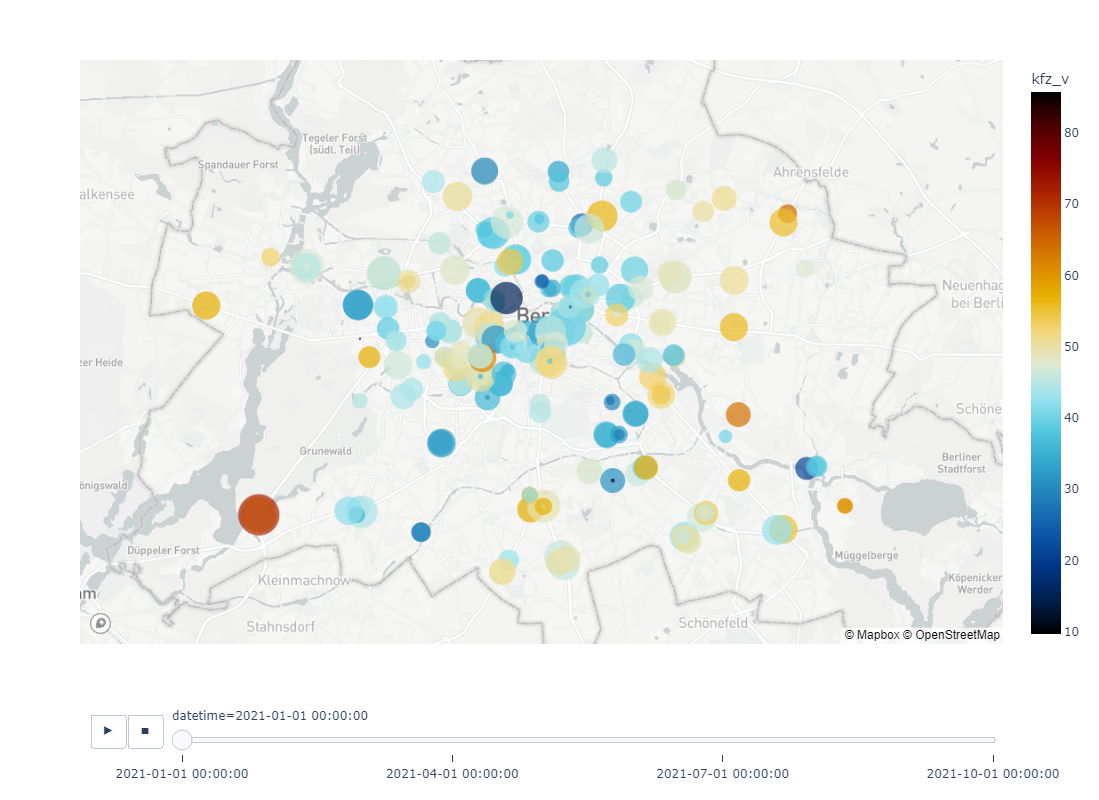

In [11]:
import plotly.express as px

berlin_lat = 52.52
berlin_lon = 13.405

px.set_mapbox_access_token("TOKEN")

fig = px.scatter_mapbox(
    data_frame=detector_data_df[detector_data_df['day_third'] == 1],
    animation_frame = 'datetime',
    animation_group="mq_name",
    color="kfz_v",
    size="kfz_q",
    color_continuous_scale=px.colors.cyclical.IceFire, 
    size_max=30, zoom=10,
    lat=detector_data_df[detector_data_df['day_third'] == 1].geometry.y,
    lon=detector_data_df[detector_data_df['day_third'] == 1].geometry.x,
    hover_name='mq_name',
    hover_data = ['kfz_v', 'kfz_q'],
    height = 800
)

# Show the figure
fig.show()

In [12]:
incidents_df["day_third"] = incidents_df["USTUNDE"] // 8
incident_dates = incidents_df[['UJAHR', 'UMONAT']].assign(DAY=1)
incident_dates.rename(columns={'UJAHR': 'Year', 'UMONAT': 'Month'}, inplace=True)
incidents_df["datetime"] = pd.to_datetime(incident_dates).dt.to_period("Q").dt.start_time
incidents_df.rename(columns={"OBJECTID": 'incident_id', "UKATEGORIE": 'incident_type'}, inplace=True)

incidents_df = gps.GeoDataFrame(
    incidents_df[['incident_id', 'incident_type', "day_third", "datetime"]], geometry=gps.points_from_xy(incidents_df.longitude, incidents_df.latitude), crs="EPSG:4326"
)

incidents_df

incident_id  incident_type  day_third   datetime  \
0           219249              3          2 2021-10-01   
1           219248              3          2 2021-10-01   
2           219247              3          2 2021-10-01   
3           219246              3          1 2021-10-01   
4           219243              3          1 2021-10-01   
...            ...            ...        ...        ...   
11262       112174              3          2 2021-01-01   
11263       111541              3          0 2021-01-01   
11264       110370              3          2 2021-01-01   
11265       109998              3          1 2021-01-01   
11266       109753              3          1 2021-01-01   

                        geometry  
0      POINT (13.42689 52.53394)  
1      POINT (13.39209 52.43995)  
2      POINT (13.32624 52.53803)  
3      POINT (13.31652 52.49953)  
4      POINT (13.52575 52.49387)  
...                          ...  
11262  POINT (13.29634 52.51101)  
11263  POINT (13.28950 52.49381)  
11264  POINT (13.42309 52.52753)  
11265  POINT (13.35926 52.47437)  
11266  POINT (13.31287 52.62246)  

[11267 rows x 5 columns]

And here is the map of the incidents, with colour denoting the severeness of the incident 

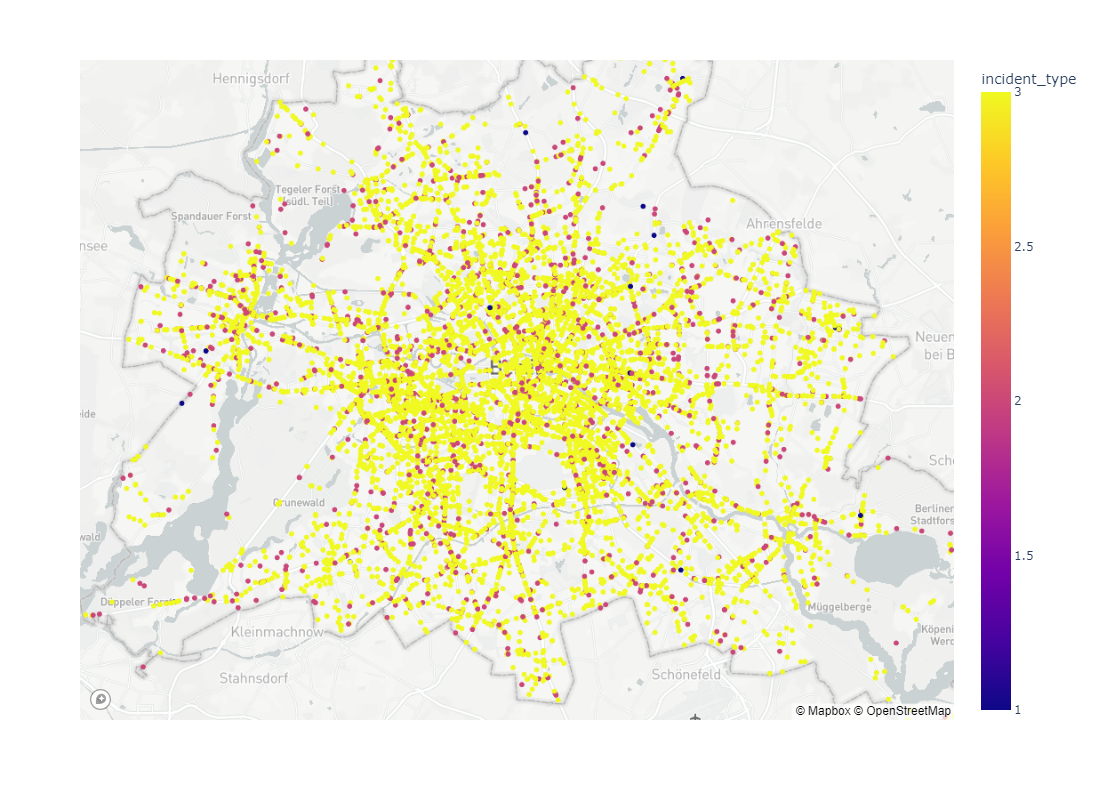

In [13]:
fig = px.scatter_mapbox(
    data_frame=incidents_df,
    size_max=30, zoom=10,
    lat=incidents_df.geometry.y,
    lon=incidents_df.geometry.x,
    color="incident_type"
)

# Set static height
fig.update_layout({
    'height': 800,
    
})

# Show the figure
fig.show()

The number of traffic detectors is low, but they may provide an information on the amount of traffic in the surrounding area. Incident inside 1 kilometer radius of the detector is considered 'nearby' here. 1 incident may be 'nearby' for several detectors. 

In [14]:
utm_incidents_gdf = incidents_df.to_crs(epsg="32633")
utm_detectors_gdf = detectors_df.to_crs(epsg="32633")

distances_gdf = utm_incidents_gdf.geometry.apply(lambda g: utm_detectors_gdf.distance(g))

distances_gdf = distances_gdf[distances_gdf < 1000]

exp = pd.concat([incidents_df['incident_id'], distances_gdf], axis=1)

exp = exp.set_index('incident_id')

In [15]:
from math import isnan

exp.dropna(how = "all", inplace=True)
exp_dict = exp.to_dict()

clean_dict = {detectors_df['mq_name'].iloc[key]: [(c_key, c_val) for (c_key, c_val) in val.items() if not isnan(c_val)] for (key, val) in exp_dict.items()}

pd.DataFrame.from_dict(clean_dict, orient="index")

0                             1    \
TE001  (216303, 225.04987877813323)  (214150, 136.07735486925026)   
TE002  (216303, 236.24769394422117)    (214150, 148.738011841123)   
TE004   (219225, 568.6778606544987)   (219157, 819.4637656613154)   
TE005   (219225, 743.2995534970856)    (219157, 609.722677896891)   
TE006   (219225, 899.7151953170785)   (219157, 672.7429748390934)   
...                             ...                           ...   
TE581   (218956, 961.9532533705973)   (218918, 437.5858328980977)   
TE582   (219021, 753.8393957455496)   (218548, 571.2664279342328)   
TE583    (219021, 756.286760664451)   (218548, 604.3888285383931)   
TE592   (219005, 977.2970641257336)    (218972, 856.242498558179)   
TE593   (218972, 816.2399061416713)   (218729, 826.0096352784507)   

                                2                             3    \
TE001   (212990, 114.9146666855495)  (212243, 439.10171377839174)   
TE002  (212990, 124.50313515975712)   (212243, 446.9576621888008)   
TE004  (219016, 327.96214411875667)   (218678, 761.2173493421102)   
TE005   (219016, 365.1435344611056)   (218678, 554.2531990728105)   
TE006  (219016, 171.80306892415427)   (218678, 571.9964358631779)   
...                             ...                           ...   
TE581   (218617, 523.2407009020545)  (218603, 447.39650161814717)   
TE582   (218166, 678.2676329902674)   (218130, 544.5864843163703)   
TE583   (218166, 717.0697926844331)   (218130, 560.5131407030206)   
TE592   (218729, 868.2805610014171)   (218703, 680.5365587524262)   
TE593    (218703, 608.067683080854)   (218680, 399.3505245394231)   

                                4                             5    \
TE001  (212158, 217.11296467795708)   (211634, 852.7047550565536)   
TE002   (212158, 228.4827723346773)   (211634, 841.4125808543322)   
TE004   (218378, 37.65285684716321)   (218201, 863.1762712057433)   
TE005  (218378, 191.69685451832405)   (218201, 736.7941844004222)   
TE006   (218378, 299.2409907607097)   (218201, 977.6325164490625)   
...                             ...                           ...   
TE581    (218476, 564.860524877297)    (218439, 45.9717255303053)   
TE582   (217992, 928.9775967395001)   (217659, 987.4363003539489)   
TE583   (217992, 966.7208965096728)   (217589, 811.3781626963657)   
TE592  (218680, 331.77384035871296)   (218381, 673.3048010059662)   
TE593   (218381, 600.1274734702766)  (218360, 411.28458143698754)   

                                6                             7    \
TE001   (211269, 77.45594916039191)   (210273, 922.8485110631049)   
TE002   (211269, 88.03521105237708)    (210273, 921.982179205908)   
TE004   (216968, 276.0994792858463)   (216882, 656.5613327284901)   
TE005  (216968, 342.34928586152387)    (216882, 780.956532422064)   
TE006   (218079, 996.7859599601469)  (216968, 198.15495945396242)   
...                             ...                           ...   
TE581   (218434, 916.7785299737476)   (218294, 870.2746881865756)   
TE582   (217589, 850.6424918596709)   (217322, 888.9526636302928)   
TE583    (217322, 926.619693971238)   (216987, 606.8883339830599)   
TE592   (218360, 384.9432388307681)    (218086, 954.329603380624)   
TE593   (218126, 977.0801980073963)   (218059, 186.3085585353688)   

                                8                             9    ...   268  \
TE001   (209722, 434.3657750029976)  (209704, 43.441127612072606)  ...  None   
TE002  (209722, 423.72170889519083)   (209704, 31.38724210381258)  ...  None   
TE004   (216474, 881.2341015584313)   (216163, 680.9010747005349)  ...  None   
TE005   (216474, 941.6869952313517)   (216165, 999.6478270967033)  ...  None   
TE006   (216882, 991.0470001902747)   (216122, 643.2726055082064)  ...  None   
...                             ...                           ...  ...   ...   
TE581   (218166, 852.7893253888657)  (217992, 153.65647720775868)  ...  None   
TE582   (217305, 995.8548102437838)   (216987, 574.9047270846664)  ...  None

In [16]:
near_incidents_records = [{'mq_name': key, 'incident_id': incident_id, 'distance': distance}  for key, value in clean_dict.items() for (incident_id, distance) in value]
near_incidents_df = pd.DataFrame.from_records(near_incidents_records)

Here we can see one of the two final datasets. This one provides detailed data on both detector and incident

In [17]:
detectors_and_incidents_df = detector_data_df.merge(right = near_incidents_df, on='mq_name').merge(right = incidents_df, on=['incident_id', 'datetime', 'day_third'])
detectors_and_incidents_df.rename(columns={'geometry_x': 'detector_loc', 'geometry_y': 'incident_loc'}, inplace=True)
detectors_and_incidents_df.head()

mq_name               detector_loc   datetime  day_third   kfz_q   pkw_q  \
0   TE001  POINT (13.19258 52.43387) 2021-01-01          0  167171  144995   
1   TE001  POINT (13.19258 52.43387) 2021-01-01          1  859632  795566   
2   TE001  POINT (13.19258 52.43387) 2021-01-01          1  859632  795566   
3   TE001  POINT (13.19258 52.43387) 2021-01-01          1  859632  795566   
4   TE001  POINT (13.19258 52.43387) 2021-01-01          2  499194  474975   

   lkw_q      kfz_v      pkw_v      lkw_v  incident_id    distance  \
0  22171  65.337505  65.125763  66.785666       112994  845.034166   
1  64055  55.921319  55.066814  66.287659       210273  922.848511   
2  64055  55.921319  55.066814  66.287659       209722  434.365775   
3  64055  55.921319  55.066814  66.287659       112537  755.223212   
4  24222  55.810593  55.459428  62.846049       211634  852.704755   

   incident_type               incident_loc  
0              3  POINT (13.19986 52.44002)  
1              3  POINT (13.19989 52.44086)  
2              2  POINT (13.19893 52.43431)  
3              3  POINT (13.19906 52.43938)  
4              3  POINT (13.20511 52.43406)

In [18]:
incident_counts_df = near_incidents_df.merge(right = incidents_df, on='incident_id')[['mq_name', 'datetime', 'day_third', 'incident_id']].groupby(['mq_name', 'datetime', 'day_third']).count().reset_index()
incident_counts_df

mq_name   datetime  day_third  incident_id
0      TE001 2021-01-01          0            1
1      TE001 2021-01-01          1            3
2      TE001 2021-01-01          2            2
3      TE001 2021-04-01          0            1
4      TE001 2021-04-01          1            1
...      ...        ...        ...          ...
3289   TE593 2021-07-01          1           31
3290   TE593 2021-07-01          2           25
3291   TE593 2021-10-01          0            3
3292   TE593 2021-10-01          1           17
3293   TE593 2021-10-01          2           21

[3294 rows x 4 columns]

Here is the second final dataset that provides an aggregate data of the incidents. It may be useful for overviews such as the following one

In [19]:
detectors_and_incident_counts_df = detector_data_df.merge(right = incident_counts_df, on=['mq_name', 'datetime', 'day_third'])
detectors_and_incident_counts_df.rename(columns={'incident_id': 'incident_count'}, inplace=True)
detectors_and_incident_counts_df.head()

mq_name                   geometry   datetime  day_third    kfz_q    pkw_q  \
0   TE001  POINT (13.19258 52.43387) 2021-01-01          0   167171   144995   
1   TE001  POINT (13.19258 52.43387) 2021-01-01          1   859632   795566   
2   TE001  POINT (13.19258 52.43387) 2021-01-01          2   499194   474975   
3   TE002  POINT (13.19275 52.43381) 2021-01-01          0   433677   398390   
4   TE002  POINT (13.19275 52.43381) 2021-01-01          1  1135257  1074774   

   lkw_q      kfz_v      pkw_v      lkw_v  incident_count  
0  22171  65.337505  65.125763  66.785666               1  
1  64055  55.921319  55.066814  66.287659               3  
2  24222  55.810593  55.459428  62.846049               2  
3  35279  72.092168  72.604573  65.888319               1  
4  60486  71.412184  71.645800  67.187465               3

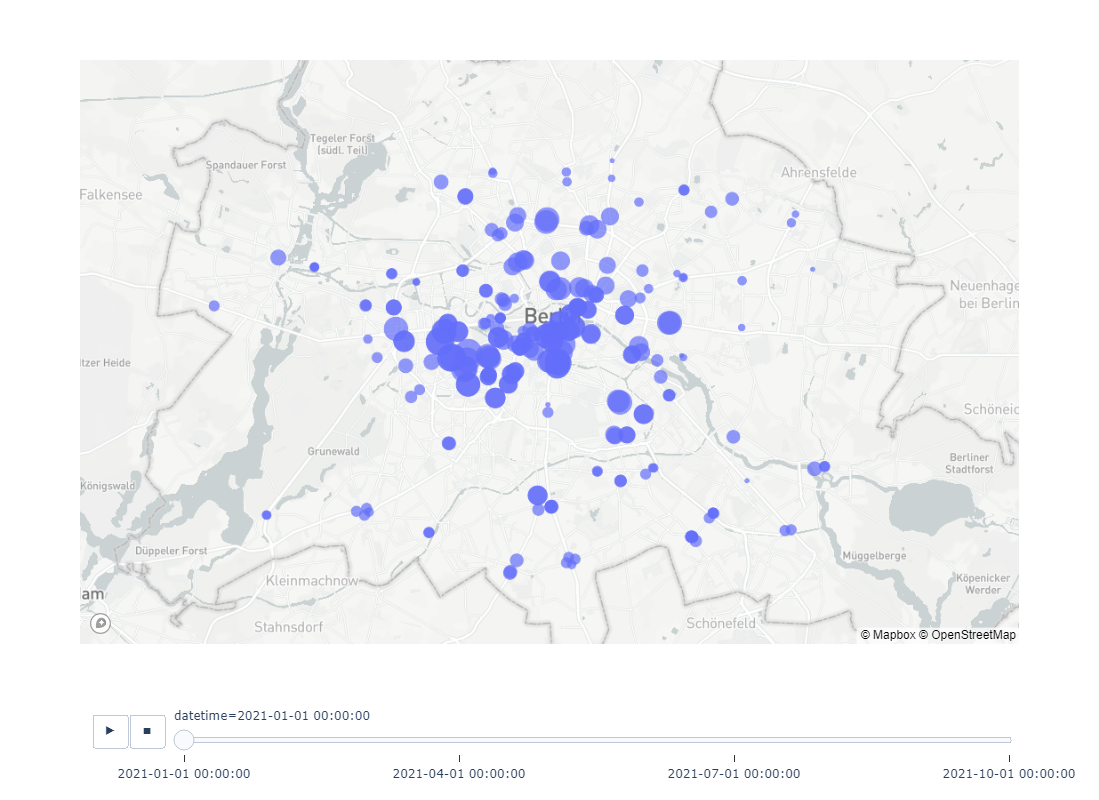

In [20]:
fig = px.scatter_mapbox(
    data_frame=detectors_and_incident_counts_df[detectors_and_incident_counts_df['day_third'] == 1],
    animation_frame = 'datetime',
    animation_group="mq_name",
    size='incident_count',
    size_max=30, zoom=10,
    lat=detectors_and_incident_counts_df[detectors_and_incident_counts_df['day_third'] == 1].geometry.y,
    lon=detectors_and_incident_counts_df[detectors_and_incident_counts_df['day_third'] == 1].geometry.x,
    height = 800
)

# Show the figure
fig.show()

# Is there statistically significant correlation in the data

For this test Pearson t-test. Significance level is 1%

In [21]:
from scipy.stats import pearsonr

test_result_speed = pearsonr(detectors_and_incident_counts_df['incident_count'], detectors_and_incident_counts_df['kfz_v'])
print(f'P-value for speed is {test_result_speed.pvalue}')

test_result_volume = pearsonr(detectors_and_incident_counts_df['incident_count'], detectors_and_incident_counts_df['kfz_q'])
print(f'P-value for volume is {test_result_volume.pvalue}')

test_result_flux = pearsonr(detectors_and_incident_counts_df['incident_count'], detectors_and_incident_counts_df['kfz_v']*detectors_and_incident_counts_df['kfz_q'])
print(f'P-value for flux is {test_result_flux.pvalue}')

P-value for speed is 5.966941088028054e-34
P-value for volume is 1.3563722956088462e-39
P-value for flux is 3.6547215989237853e-22


Data provides strong evidence that those values have statistically significant correlation. The graph below suggests that amount of traffic accidents may have linear dependency with volume of traffic (which is reasonable) and quadratic with speed

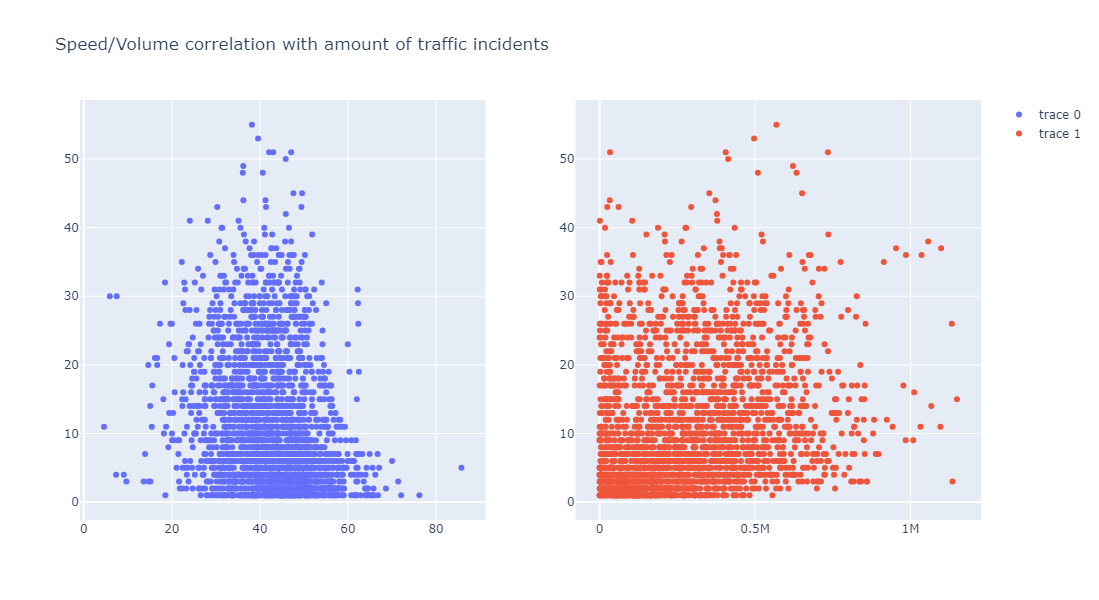

In [22]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)

fig.add_scatter(
    x=detectors_and_incident_counts_df['kfz_v'], y=detectors_and_incident_counts_df['incident_count'],
    row=1, col=1, mode='markers'
)

fig.add_scatter(
    x=detectors_and_incident_counts_df['kfz_q'], y=detectors_and_incident_counts_df['incident_count'],
    row=1, col=2, mode='markers'
)

fig.update_layout(height=600, width=800, title_text="Speed/Volume correlation with amount of traffic incidents")
fig.show()

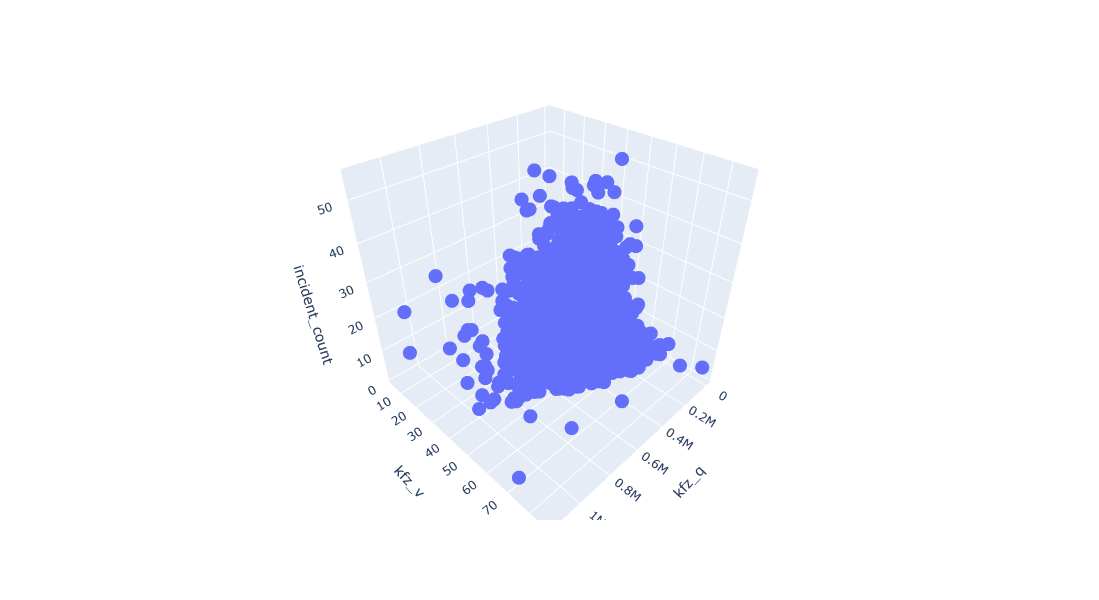

In [23]:
fig = px.scatter_3d(detectors_and_incident_counts_df, x='kfz_q', y='kfz_v', z='incident_count', size_max = 2, height=600, width=800)
fig.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, normalize

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X = detectors_and_incident_counts_df[['kfz_q', 'kfz_v']]
X_poly = poly_features.fit_transform(X)

y = detectors_and_incident_counts_df['incident_count']

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Print the first 10 coefficients to avoid a very long output
print("\nCoefficients of the model:")
for i in range(5):
    print(f"Coefficient {i}: {reg.coef_[i]:.7f}")

Mean Squared Error: 78.74

Coefficients of the model:
Coefficient 0: 0.0000080
Coefficient 1: -0.0359737
Coefficient 2: -0.0000000
Coefficient 3: 0.0000002
Coefficient 4: -0.0034502


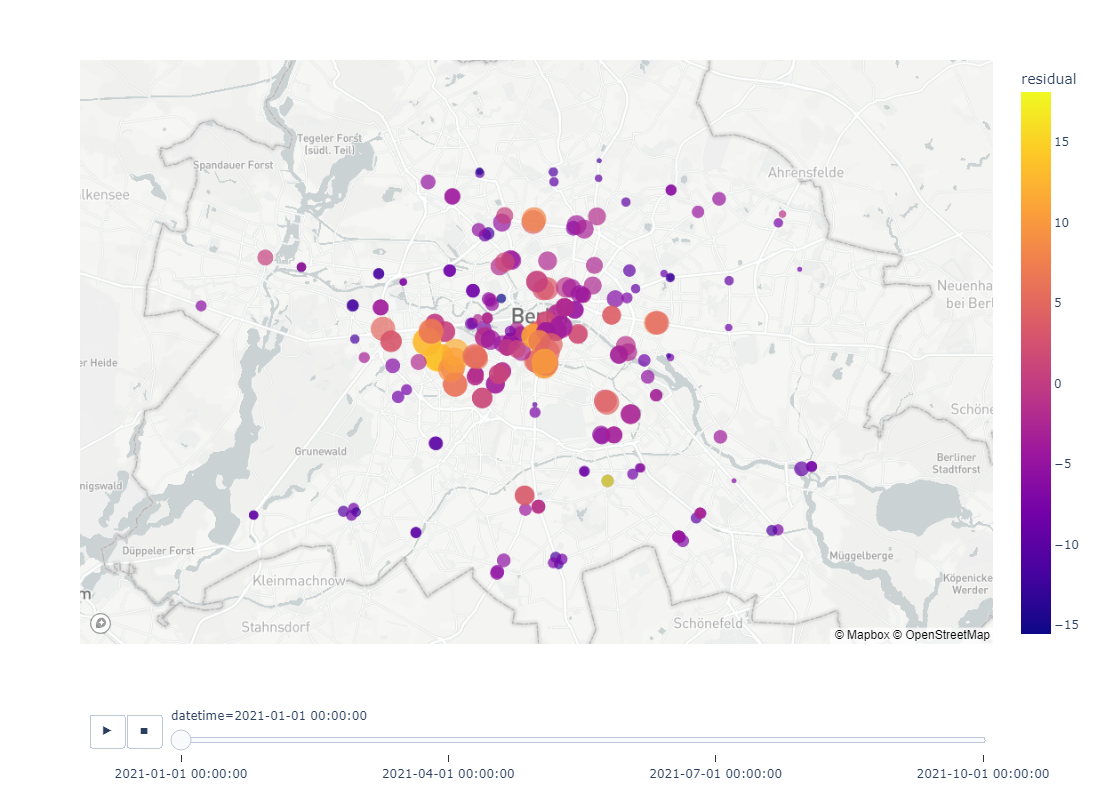

In [25]:
residuals = y - reg.predict(X_poly)
residuals.rename("residual", inplace=True)
residual_df = pd.concat([detectors_and_incident_counts_df, pd.Series(residuals)], axis=1)

fig = px.scatter_mapbox(
    data_frame=residual_df[residual_df['day_third'] == 1],
    animation_frame = 'datetime',
    animation_group="mq_name",
    size='incident_count',
    color = 'residual',
    size_max=30, zoom=10,
    lat=residual_df[residual_df['day_third'] == 1].geometry.y,
    lon=residual_df[residual_df['day_third'] == 1].geometry.x,
    height = 800
)

# Show the figure
fig.show()